In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read dataset
df = pd.read_csv('data/dataset.csv')

# DV preprocessing
df['DV'] = df['DV'].replace(".", None)
df['DV'] = df['DV'].astype(float)

# print statistics and head
print(df.describe())
df.head(3)

                ID         TIME          DV         EVID          MDV  \
count  1128.000000  1128.000000  708.000000  1128.000000  1128.000000   
mean    252.393617    73.038298    3.534583     1.069149     0.606383   
std      45.830183    67.455651    6.567813     0.928981     0.488768   
min     195.000000     0.000000   -0.000911     0.000000     0.000000   
25%     218.000000    50.000000    0.000000     0.000000     0.000000   
50%     241.500000    59.900000    0.007690     1.000000     1.000000   
75%     274.000000    60.000000    3.330000     2.000000     1.000000   
max     374.000000   300.000000   39.700000     2.000000     1.000000   

               CMT         XEXP          BQL        XEXP2     AGE        BLOOD  
count  1128.000000  1128.000000  1128.000000  1128.000000  1128.0  1128.000000  
mean      1.577128    25.521277     0.120567     0.702128     5.0     0.085106  
std       4.090512     4.544787     0.418731     0.457526     0.0     0.279164  
min      -7.000000

,ID,TIME,AMT,DV,EVID,MDV,CMT,XEXP,BQL,XEXP2,AGE,BLOOD
0,195,0.0,1,NaN,1,1,1,24.0,0,1,5,0
1,195,59.9,.,NaN,2,1,-1,24.0,0,1,5,0
2,195,59.9,.,0.0,2,1,1,24.0,0,1,5,0


(119, 2)


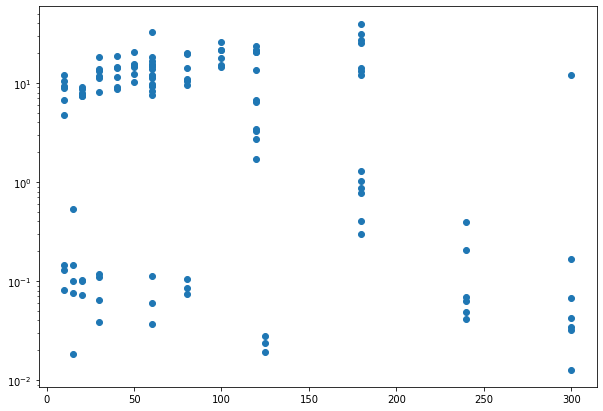

In [28]:
#plotting of observed concentration (DV) 
# for central paracetamol in larvae (CMT==2)
# for the observation events (EVID==0)

temp_df = df[(df['CMT'] == 2) & 
            #(df['XEXP2'] == 0) &
            (df['MDV'] == 0) & 
            (df['EVID'] == 0) &
            (df['DV'] is not None )][['DV', 'TIME']]
print(temp_df.shape)

plt.figure(figsize=(10,7))
plt.yscale("log")
plt.scatter(x=temp_df['TIME'],y=temp_df['DV'])
plt.show()

In [26]:
# Experiment 1
p1 = np.load('results/exp1/p_val.npy')
s1 = np.load('results/exp1/s_val.npy')
g1 = np.load('results/exp1/g_val.npy')
pe1 = np.load('results/exp1/pe_val.npy')
se1 = np.load('results/exp1/se_val.npy')
ge1 = np.load('results/exp1/ge_val.npy')
# Expreriment 2
p2 = np.load('results/exp2/p_val.npy')
s2 = np.load('results/exp2/s_val.npy')
g2 = np.load('results/exp2/g_val.npy')
pe2 = np.load('results/exp2/pe_val.npy')
se2 = np.load('results/exp2/se_val.npy')
ge2 = np.load('results/exp2/ge_val.npy')

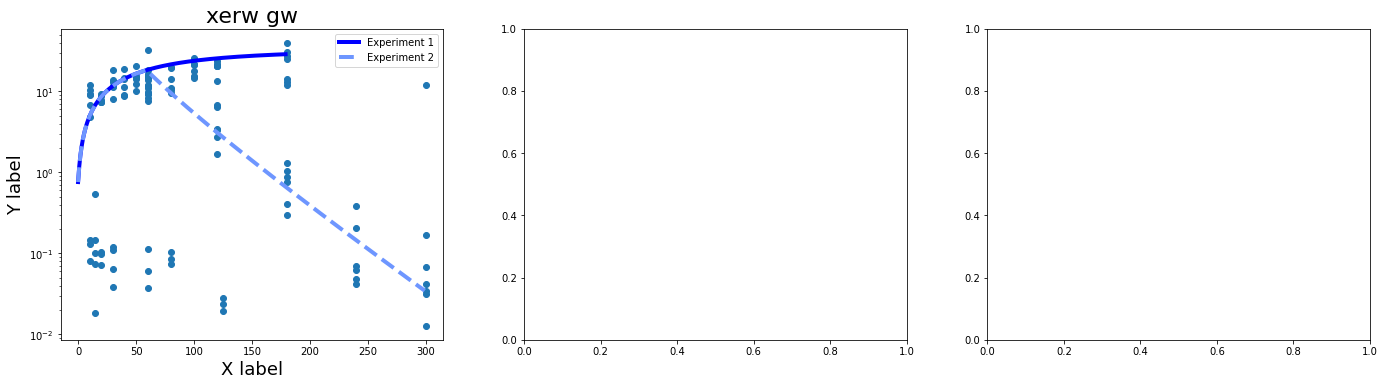

In [27]:
fig, axis = plt.subplots(1,3, figsize=(20,6))
fig.tight_layout(pad=5.0)
# fig.suptitle(title, fontsize=24, fontweight='bold')
# Paracetamol
axis[0].set_title("xerw gw", size=22)
axis[0].plot(p1, color='#0000ff', linewidth=4, linestyle='solid', label='Experiment 1')
axis[0].plot(p2, '--', color='#6e96ff', linewidth=4, label='Experiment 2')
axis[0].set_xlabel("X label",  fontsize=18)
axis[0].set_ylabel("Y label",  fontsize=18)
axis[0].set_yscale("log", base=10)
axis[0].set_xscale("linear")
axis[0].legend(prop={'size': 10})
axis[0].scatter(x=temp_df['TIME'],y=temp_df['DV'])

In [22]:
df['TIME'].unique()

array([  0. ,  59.9,  60. , 120. , 180. , 240. , 300. ,  10. ,  20. ,
        30. ,  40. ,  50. ,  80. , 100. ,  15. , 125. ])